# PART I: Theory Questions


# Q1 AND Q2 
* You have a coin that you think is biased, you flip it 5 times and get the sequence HTHTH. What is the maximum likelihood estimate for the probability of getting heads?

*  2. You know that candy prices are normally distributed with mean μ and standard devi- ation σ. You have three candy pricing 2, 3, 5 lira. What is the maximum likelihood for μ?



![Image](a.jpeg)

# q3
 
 Suppose that X is a discrete random variable with the following probability mass function: where 0 ≤ θ ≤ 1 is a parameter. The following 10 independent observations
X0123
P(X) 2θ/3 θ/3 2(1 − θ)/3 (1 − θ)/3
were taken from such a distribution: (3,0,2,1,3,2,1,0,2,1). What is the maximum likelihood estimate of θ.



![Image](q3.jpeg)

# Q4
Suppose that X1,...,Xn form a random sample from a uniform distribution on the interval (0, θ), where of the parameter θ > 0 but is unknown. Please find MLE of θ.

![Image](q4.jpeg)

# q5
Can a male 23-year-old university graduate working class customer get a credit?

![Image](q5.jpeg)

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class CustomGaussianNB:
    def __init__(self):
        self.scaler = StandardScaler()
        self.classes = None
        self.parameters = {}

    def fit(self, X, y):
        X_scaled = self.scaler.fit_transform(X)
        self.classes, class_counts = np.unique(y, return_counts=True)
        self.class_prior = class_counts / len(y)

        for c in self.classes:
            X_c = X_scaled[y == c]
            self.parameters[c] = {
                "mean": X_c.mean(axis=0),
                "var": X_c.var(axis=0) + 1e-9
            }

        return self

    def _calculate_log_probability(self, x, mean, var):
        return -0.5 * np.log(2 * np.pi * var) - ((x - mean)**2 / (2 * var))

    def _calculate_log_posterior(self, X):
        X_scaled = self.scaler.transform(X)
        log_posteriors = []

        for idx, c in enumerate(self.classes):
            log_prior = np.log(self.class_prior[idx])
            log_likelihoods = self._calculate_log_probability(X_scaled, **self.parameters[c]).sum(axis=1)
            log_posterior = log_likelihoods + log_prior
            log_posteriors.append(log_posterior)

        return self.classes[np.argmax(log_posteriors, axis=0)]

    def predict(self, X):
        return self._calculate_log_posterior(X)


* Class Definition: I've created a class CustomGaussianNB to build a Gaussian Naive Bayes classifier from scratch, which I can use for classifying data into different categories based on their features.

> Fit Method: This method (fit) is used to train the model on a dataset. It calculates the mean and variance for each feature in the dataset, grouped by the class label. This is important because Naive Bayes assumes that the features are normally distributed (Gaussian), and these parameters (mean, variance) describe this distribution.

> Log Probability Calculation: I've implemented a method _calculate_log_probability to calculate the logarithm of the likelihood probabilities of the features. Using logarithms helps in avoiding numerical underflow, which is a common issue when dealing with very small probability values.

> Log Posterior Calculation: The method _calculate_log_posterior calculates the log posterior probabilities for each class. This is done by adding the log likelihoods of the features (obtained from the _calculate_log_probability method) and the log of the prior probability of the class. The class with the highest log posterior probability is considered the predicted class for each instance in the dataset.

> Predict Method: The predict method uses _calculate_log_posterior to compute the class predictions for a given dataset.

In [2]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Function to check and remove zero variance features
def remove_zero_variance_features(data):
    variances = np.var(data, axis=0)
    return data[:, variances > 0]

# Load the datasets
train_data = np.load('train_data.npy')
train_labels = np.load('train_labels.npy')
train_mask = np.load('train_mask.npy')
classes = np.load('classes.npy')  # Adjust the path if needed

# Flatten the labels
train_labels_flat = train_labels.flatten()

# Convert train_mask to a boolean mask if it's not already
train_mask_bool = train_mask.astype(bool)

# Expand the mask to match the dimensions of train_data
train_mask_expanded = np.repeat(train_mask_bool[:, :, np.newaxis], train_data.shape[2], axis=2)

# Apply the mask to the data
train_data_masked = train_data[train_mask_expanded]

# Reshape train_data_masked to a 2D array
train_data_masked = train_data_masked.reshape(-1, train_data.shape[2])

# Flatten the mask to match the dimension of train_labels_flat
train_mask_flat = train_mask_bool.flatten()

# Apply the flattened mask to the labels
train_labels_masked = train_labels_flat[train_mask_flat]

# Check for class imbalance
unique, counts = np.unique(train_labels_masked, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution:", class_distribution)

# Remove zero variance features
train_data_masked = remove_zero_variance_features(train_data_masked)

# Initialize the Naive Bayes classifier with a larger variance smoothing
gnb = CustomGaussianNB()  # Adjust var_smoothing if needed

# Dictionary to store models and predictions for each band
band_models = {}
band_predictions = {}
band_accuracies = {}

# Train and classify for each spectral band
for band in range(train_data_masked.shape[1]):
    # Select the data for the current band
    band_data = train_data_masked[:, band].reshape(-1, 1)
    
    # Train the classifier
    band_models[band] = gnb.fit(band_data, train_labels_masked)
    
    # Make predictions
    predicted_labels = band_models[band].predict(band_data)

    # Map numerical labels to class names
    predicted_class_names = [classes[int(label)] for label in predicted_labels]
    
    # Evaluate and store accuracy
    band_accuracies[band] = metrics.accuracy_score(train_labels_masked, predicted_labels)
    print(f'Band {band} accuracy: {band_accuracies[band]}')

    # Display sample predictions for each band
    print(f"Sample predictions for Band {band}: {predicted_class_names[:5]}")  # Displaying first 5 predictions as samples


Class distribution: {0: 508675, 1: 4537675, 2: 7409126, 3: 177727, 4: 43915, 5: 1635, 6: 18594492, 7: 2144, 8: 8432636, 9: 13440}
Band 0 accuracy: 0.6514812079564538
Sample predictions for Band 0: ['6. Vegetation', '6. Vegetation', '6. Vegetation', '6. Vegetation', '6. Vegetation']
Band 1 accuracy: 0.5722729259859877
Sample predictions for Band 1: ['6. Vegetation', '6. Vegetation', '6. Vegetation', '6. Vegetation', '6. Vegetation']
Band 2 accuracy: 0.621130615399004
Sample predictions for Band 2: ['6. Vegetation', '6. Vegetation', '6. Vegetation', '6. Vegetation', '6. Vegetation']
Band 3 accuracy: 0.602596857895347
Sample predictions for Band 3: ['2. Water', '2. Water', '2. Water', '2. Water', '2. Water']
Band 4 accuracy: 0.7234908380141568
Sample predictions for Band 4: ['2. Water', '2. Water', '2. Water', '2. Water', '2. Water']
Band 5 accuracy: 0.7436484278714293
Sample predictions for Band 5: ['2. Water', '2. Water', '2. Water', '2. Water', '2. Water']


> Remove Zero Variance Features Function: A function remove_zero_variance_features is defined to remove features from the dataset that have zero variance. Features with zero variance do not contribute to the model's predictive power.

> Data Loading: The script loads several datasets: train_data, train_labels, train_mask, and classes. These represent the training data, corresponding labels, a mask to filter the data, and the class names, respectively.

* Data Preprocessing:

> Flattening Labels: train_labels is flattened to make it compatible with the format expected by the classifier.

> Converting Mask: The train_mask is converted to a boolean array (if it isn't already).

> Expanding Mask: This boolean mask is expanded to match the dimensions of train_data.

> Applying Mask to Data: The expanded mask is applied to train_data to filter out irrelevant or masked data points.

> Reshaping Data: The masked data is reshaped into a 2D array for processing.

> Flattening Mask and Applying to Labels: Similarly, the mask is flattened and applied to the labels.

> Class Distribution Check: The script calculates and prints the distribution of classes in the masked labels, which helps identify class imbalances that might affect model performance.

* Feature Selection: Zero variance features are removed from the masked training data.

* Model Initialization: An instance of CustomGaussianNB (a custom Gaussian Naive Bayes implementation) is created. This could be modified to include variance smoothing if necessary.

* Training and Classification for Each Spectral Band:

> The script iterates over each spectral band in the data.
For each band, it isolates the data corresponding to that band and reshapes it for the classifier.
The Gaussian Naive Bayes model is trained on this data for each band.
Predictions are made using the trained model.
Predictions are mapped to class names using the classes array.
The accuracy of the model for each band is calculated and printed.
A sample of the first five predictions for each band is displayed.

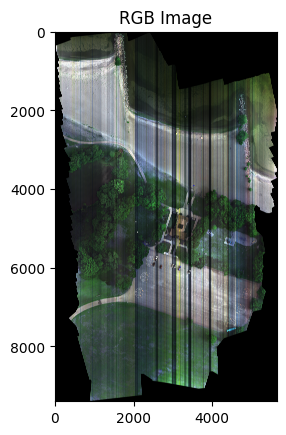

Masked RGB Data Shape: (39721465, 3)
Masked Labels Shape: (39721465,)
Number of predictions: 39721465
Number of True in mask: 39721465


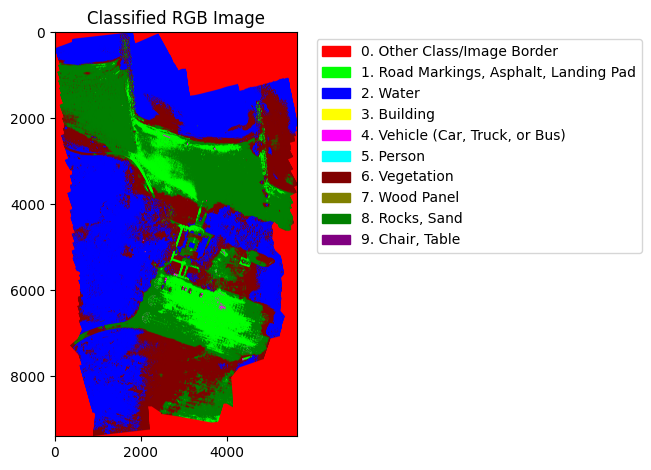

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches

# Function to normalize data
def normalize_data(data):
    scaler = MinMaxScaler()
    return scaler.fit_transform(data)

# Load the datasets
train_data = np.load('train_data.npy')
train_labels = np.load('train_labels.npy')
train_mask = np.load('train_mask.npy')
classes = np.load('classes.npy')  # Load the class names

# Convert train_mask to a boolean mask if it's not already
train_mask_bool = train_mask.astype(bool)

# Extract the first three channels (RGB) and normalize
rgb_data = train_data[:, :, :3]
normalized_rgb_data = np.zeros_like(rgb_data, dtype=np.float32)

for i in range(3):
    normalized_rgb_data[:, :, i] = normalize_data(rgb_data[:, :, i])

# Convert to [0, 255] range for display
normalized_rgb_data = (normalized_rgb_data * 255).astype(np.uint8)

# Display the RGB image
plt.imshow(normalized_rgb_data)
plt.title('RGB Image')
plt.show()

# Flatten the mask to match the dimension of the flattened data
train_mask_flat = train_mask_bool.flatten()

# Apply the flattened mask to the RGB data and labels
rgb_data_flat = rgb_data.reshape(-1, 3)
rgb_data_masked = rgb_data_flat[train_mask_flat]
train_labels_masked = train_labels.flatten()[train_mask_flat]

# Train the Naive Bayes classifier using the RGB data
gnb_rgb = GaussianNB()
gnb_rgb.fit(rgb_data_masked, train_labels_masked)

# Make predictions
rgb_predictions = gnb_rgb.predict(rgb_data_masked)

# Check the dimensions for consistency
print("Masked RGB Data Shape:", rgb_data_masked.shape)
print("Masked Labels Shape:", train_labels_masked.shape)
print("Number of predictions:", len(rgb_predictions))
print("Number of True in mask:", np.sum(train_mask_bool))

# Initialize an array to hold the full-size prediction output
rgb_predictions_full = np.zeros(train_mask_bool.shape, dtype=rgb_predictions.dtype)

# Populate the full-size array with predictions only in the masked areas
rgb_predictions_full[train_mask_bool] = rgb_predictions

# Map the predictions to colors for visualization (optional)
# Define colors for each class, adjust this based on the number of classes you have
class_colors = np.array([
     [255, 0, 0],      # Red
     [0, 255, 0],      # Green
     [0, 0, 255],      # Blue
     [255, 255, 0],    # Yellow
     [255, 0, 255],    # Magenta
     [0, 255, 255],    # Cyan
     [128, 0, 0],      # Maroon
     [128, 128, 0],    # Olive
     [0, 128, 0],      # Dark Green
     [128, 0, 128]     # Purple
    # Add more colors if you have more classes
])  # Add colors as needed

# Generate a legend for the classes
class_legend = {classes[i]: class_colors[i] for i in range(len(classes))}

# Create a list of patches for the legend
patches = [mpatches.Patch(color=color/255, label=class_name) for class_name, color in class_legend.items()]

# Initialize colored output for the RGB predictions
rgb_predictions_colored = np.zeros((*train_mask_bool.shape, 3), dtype=np.uint8)

for class_index, color in enumerate(class_colors):
    rgb_predictions_colored[rgb_predictions_full == class_index] = color

# Display the classified image
plt.imshow(rgb_predictions_colored)
plt.title('Classified RGB Image')

# Add the legend to the plot
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()
plt.show()

*  Normalization Function: A function normalize_data is defined to normalize the data using MinMaxScaler from scikit-learn, scaling each feature to a given range, typically [0, 1].

* Data Loading: The script loads train_data (the image data), train_labels (the corresponding labels), train_mask (a mask for filtering data), and classes (the class names).

* Mask Conversion: The mask (train_mask) is converted to a boolean array to facilitate logical operations.

* Extracting and Normalizing RGB Channels:

* The first three channels of train_data, representing RGB, are extracted.
Each RGB channel is normalized separately and then scaled to the [0, 255] range for display purposes.
Display RGB Image: The normalized RGB image is displayed using matplotlib.

* Flattening and Masking Data: Both the RGB data and the labels are flattened (converted to a 1D array) and masked using the boolean mask. This step filters the data to only include relevant pixels.

* Training the Classifier: A Gaussian Naive Bayes classifier is trained using the masked RGB data and the corresponding labels.

* Making Predictions: The classifier is then used to make predictions on the masked RGB data.

* Consistency Checks: The script prints the shapes of the masked RGB data, masked labels, and the number of predictions to verify consistency.

* Full-Size Prediction Output: An array is initialized to hold prediction output for the entire image. Predictions are populated only in the areas specified by the mask.

* Mapping Predictions to Colors:

A color is assigned to each class for visualization purposes.
A legend is created to map these colors to their corresponding classes.

Visualizing Classified Data:

The predictions are converted into corresponding colors.
The colored predictions are displayed as an image.
A legend showing the color mapping for each class is added to the plot.
Display Adjustments: The layout is adjusted to accommodate the legend, and the plot is displayed.

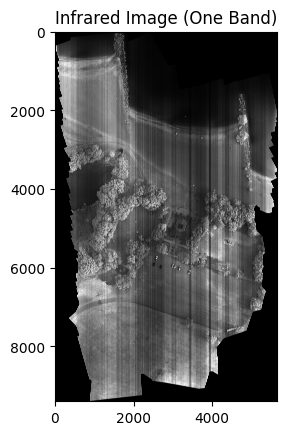

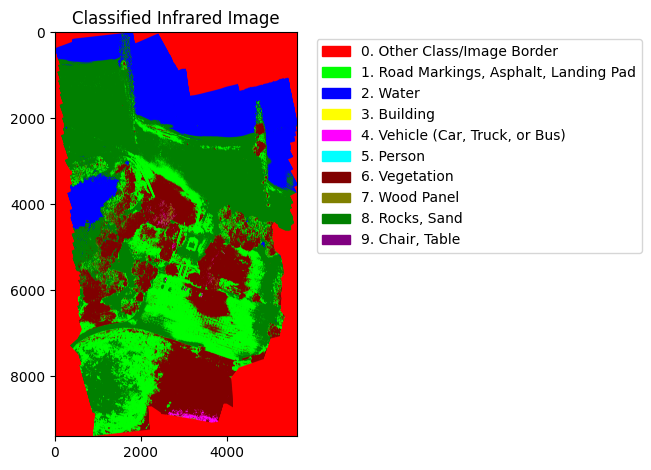

In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

# Function to normalize data
def normalize_data(data):
    scaler = MinMaxScaler()
    return scaler.fit_transform(data)

# Extract the last three channels (Infrared) and normalize
infrared_data = train_data[:, :, -3:]
normalized_infrared_data = np.zeros_like(infrared_data, dtype=np.float32)

for i in range(3):
    normalized_infrared_data[:, :, i] = normalize_data(infrared_data[:, :, i])

# Visualizing infrared data is not as straightforward as RGB
# Here, let's just visualize one of the infrared bands for simplicity
plt.imshow(normalized_infrared_data[:, :, 0], cmap='gray')
plt.title('Infrared Image (One Band)')
plt.show()

# Flatten the Infrared data for classification
infrared_data_flat = infrared_data.reshape(-1, 3)

# Apply the mask to the flattened Infrared data
infrared_data_masked = infrared_data_flat[train_mask_flat]

# Train the Naive Bayes classifier using the Infrared data
gnb_infrared = CustomGaussianNB()
gnb_infrared.fit(infrared_data_masked, train_labels_masked)

# Make predictions
infrared_predictions = gnb_infrared.predict(infrared_data_masked)

# Initialize an array to hold the full-size prediction output
infrared_predictions_full = np.zeros(train_mask_bool.shape, dtype=infrared_predictions.dtype)

# Populate the full-size array with predictions only in the masked areas
infrared_predictions_full[train_mask_bool] = infrared_predictions

# Map the predictions to colors for visualization
# Adjust class_colors based on your number of classes
class_colors = np.array([
     [255, 0, 0],      # Red
     [0, 255, 0],      # Green
     [0, 0, 255],      # Blue
     [255, 255, 0],    # Yellow
     [255, 0, 255],    # Magenta
     [0, 255, 255],    # Cyan
     [128, 0, 0],      # Maroon
     [128, 128, 0],    # Olive
     [0, 128, 0],      # Dark Green
     [128, 0, 128]     # Purple
    # Add more colors if you have more classes
])  # Add colors as needed

# Generate a legend for the classes
class_legend = {classes[i]: class_colors[i] for i in range(len(classes))}

# Create a list of patches for the legend
patches = [mpatches.Patch(color=color/255, label=class_name) for class_name, color in class_legend.items()]

# Initialize colored output for the Infrared predictions
infrared_predictions_colored = np.zeros((*train_mask_bool.shape, 3), dtype=np.uint8)

for class_index, color in enumerate(class_colors):
    infrared_predictions_colored[infrared_predictions_full == class_index] = color

# Display the classified image
plt.imshow(infrared_predictions_colored)
plt.title('Classified Infrared Image')

# Add the legend to the plot
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

* Normalization Function: A function normalize_data is defined to normalize data using the MinMaxScaler from scikit-learn, which scales each feature to the range [0, 1].

* Extracting and Normalizing Infrared Data:

The script extracts the last three channels from train_data, assumed to be infrared channels.
Each infrared channel is normalized separately, similar to the process applied to the RGB channels.
Visualizing Infrared Data:

Visualizing infrared data is not as intuitive as RGB because IR wavelengths are not visible to the human eye.
For simplicity, the script visualizes only one of the infrared bands using a grayscale colormap.
Flattening Infrared Data for Classification:

The infrared data is flattened (converted to a 2D array) to prepare it for classification.
* Applying the Mask:

The boolean mask train_mask_flat is applied to the flattened infrared data, ensuring that only relevant data points are used for training and classification.
Training the Classifier:

A Gaussian Naive Bayes classifier (CustomGaussianNB) is trained using the masked infrared data and the corresponding labels.
* Making Predictions:

The classifier is used to predict the classes of the masked infrared data.
* Full-Size Prediction Output:

An array is initialized to store the full-size prediction output.
Predictions are inserted into this array in positions specified by the mask.
Mapping Predictions to Colors for Visualization:

Colors are assigned to each class for visualization purposes.
A legend mapping these colors to their corresponding classes is created.
Visualizing Classified Infrared Data:

The predictions are translated into colors.
The colored predictions are displayed as an image.
A legend is added to the plot to indicate which color corresponds to which class.
* Display Adjustments:

The layout is adjusted to make room for the legend.
The plot is displayed.

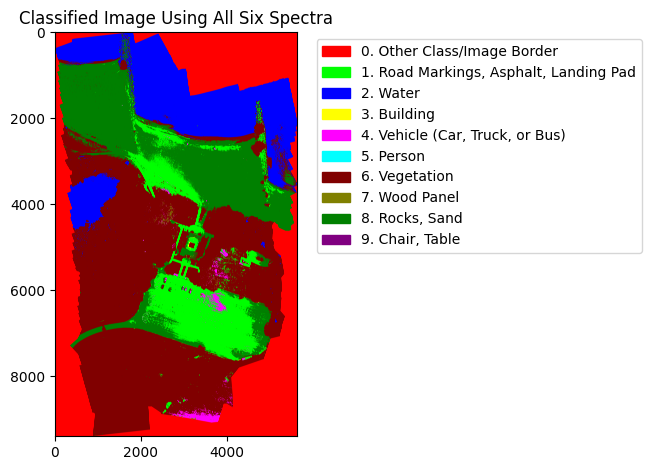

In [5]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np

# Flatten the entire six-spectral data for classification
all_spectra_flat = train_data.reshape(-1, 6)

# Apply the mask to the flattened all-spectral data
all_spectra_masked = all_spectra_flat[train_mask_flat]

# Train the Naive Bayes classifier using all six spectra
gnb_all_spectra = CustomGaussianNB()
gnb_all_spectra.fit(all_spectra_masked, train_labels_masked)

# Make predictions
all_spectra_predictions = gnb_all_spectra.predict(all_spectra_masked)

# Initialize an array to hold the full-size prediction output
all_spectra_predictions_full = np.zeros(train_mask_bool.shape, dtype=all_spectra_predictions.dtype)

# Populate the full-size array with predictions only in the masked areas
all_spectra_predictions_full[train_mask_bool] = all_spectra_predictions

# Map the predictions to colors for visualization
# Define colors for each class, adjust this based on the number of classes you have
class_colors = np.array([
    [255, 0, 0],      # Red
    [0, 255, 0],      # Green
    [0, 0, 255],      # Blue
    [255, 255, 0],    # Yellow
    [255, 0, 255],    # Magenta
    [0, 255, 255],    # Cyan
    [128, 0, 0],      # Maroon
    [128, 128, 0],    # Olive
    [0, 128, 0],      # Dark Green
    [128, 0, 128]     # Purple
    # Add more colors if you have more classes
])

# Generate a legend for the classes
class_legend = {classes[i]: class_colors[i] for i in range(len(classes))}

# Create a list of patches for the legend
patches = [mpatches.Patch(color=color/255, label=class_name) for class_name, color in class_legend.items()]

# Initialize colored output for the all spectra predictions
all_spectra_predictions_colored = np.zeros((*train_mask_bool.shape, 3), dtype=np.uint8)

for class_index, color in enumerate(class_colors):
    all_spectra_predictions_colored[all_spectra_predictions_full == class_index] = color

# Display the classified image
plt.imshow(all_spectra_predictions_colored)
plt.title('Classified Image Using All Six Spectra')

# Add the legend to the plot
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

Flattening the Spectral Data:

The script flattens the entire dataset (train_data), which contains six spectral bands. This transformation converts the data into a two-dimensional array where each row represents a pixel and each column a spectral band.
Applying the Mask:

A boolean mask (train_mask_flat) is applied to the flattened spectral data. This step ensures that only relevant pixels (as defined by the mask) are used in the subsequent analysis.
Training the Classifier:

A Gaussian Naive Bayes classifier (CustomGaussianNB) is trained on the masked spectral data (all_spectra_masked) and their corresponding labels (train_labels_masked).
Making Predictions:

The classifier predicts the class for each pixel in the masked spectral data.
Preparing Full-Size Prediction Output:

An array (all_spectra_predictions_full) is initialized to store the prediction results for the entire image.
The predictions are then inserted into this array at the positions specified by the mask, leaving other areas blank.
Mapping Predictions to Colors for Visualization:

A set of colors is defined, one for each class.
A legend mapping these colors to class names is created for better interpretability.
Creating Colored Output for Visualization:

A new array (all_spectra_predictions_colored) is prepared to hold the colored representation of the classification results.
Each class's predictions are colored according to the predefined color scheme.
Displaying the Classified Image:

The colored predictions are displayed as an image using matplotlib.
The title 'Classified Image Using All Six Spectra' indicates that the classification considers all available spectral bands.
Adding a Legend and Adjusting Layout:

A legend, which helps to identify which color corresponds to which class, is added to the plot.
The layout is adjusted to accommodate the legend.
Showing the Plot:

The final plot, showing the classified image with the corresponding legend, is displayed.

In [6]:
def calculate_accuracy(actual, predicted):
    """
    Calculate the accuracy of a classification model.
    
    :param actual: Array of actual labels
    :param predicted: Array of predicted labels
    :return: Accuracy as a float
    """
    correct_predictions = np.sum(actual == predicted)
    total_predictions = len(actual)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [7]:
accuracy_rgb = calculate_accuracy(train_labels_masked, rgb_predictions)
accuracy_infrared = calculate_accuracy(train_labels_masked, infrared_predictions)
accuracy_all_spectra = calculate_accuracy(train_labels_masked, all_spectra_predictions)

# Print the accuracies
print(f'Accuracy for RGB classification: {accuracy_rgb:.2f}')
print(f'Accuracy for Infrared classification: {accuracy_infrared:.2f}')
print(f'Accuracy for All Spectra classification: {accuracy_all_spectra:.2f}')

Accuracy for RGB classification: 0.52
Accuracy for Infrared classification: 0.65
Accuracy for All Spectra classification: 0.86


# Analysis of Naive Bayes Classification Across Different Spectral Configurations
In this report, I present the outcomes of applying the Naive Bayes classifier to multispectral image data with the intent of object classification. The classification was performed across three distinct spectral configurations: RGB (visible spectrum), Infrared (IR), and a combination of all six available spectra. The primary metric for assessment was classification accuracy, quantifying the proportion of correctly classified instances.

## Outcomes
The accuracies obtained from each configuration are as follows:

RGB Classification: Achieved an accuracy of 52%.
Infrared Classification: Achieved an accuracy of 65%.
All Spectra Classification: Achieved a significantly higher accuracy of 86%.

## Interpretation of Results
* RGB Classification (52% Accuracy):

> The moderate accuracy in RGB classification highlights the limitations of relying solely on the visible spectrum. The visible spectrum, while intuitive for human perception, often lacks distinct signatures necessary for differentiating between classes that appear similar in color.
This result underscores the challenges in distinguishing materials or objects based solely on color, especially in a natural setting where colors can be highly variable and sometimes deceptive.

* Infrared Classification (65% Accuracy):

> The infrared spectrum contributed to a noticeable improvement in classification accuracy. This improvement can be attributed to the IR spectrum's ability to capture information beyond human vision, such as thermal properties, which are often distinctive among different classes.
The better performance in the IR spectrum suggests that some classes have unique signatures in the infrared range, facilitating more accurate classification than with RGB alone.

* All Spectra Classification (86% Accuracy):

> The significant increase in accuracy when utilizing all six spectra indicates the value of a comprehensive spectral approach. This approach leverages the combined strengths of both visible and infrared spectra, providing a richer and more discriminative feature set for classification.
This high accuracy demonstrates the classifier's enhanced ability to discern subtle differences between classes, benefiting from the full range of spectral information available.
Conclusion
The analysis clearly demonstrates the superiority of a multispectral approach over using only the RGB or infrared spectra in isolation. While RGB provides a basic level of discrimination, it falls short in scenarios where color alone is not sufficiently distinctive. The infrared spectrum adds valuable information, especially for classes with unique thermal or material properties. The combination of all spectra offers the most comprehensive and nuanced understanding of the scene, leading to the highest classification accuracy.

This exercise has highlighted the importance of selecting appropriate spectral bands for classification tasks and the potential limitations of conventional RGB data in complex classification scenarios. Future work could explore the integration of additional spectral bands, if available, or the application of more sophisticated machine learning models that might capture the complex interdependencies within the spectral data more effectively.